In [1]:
%load_ext autoreload
%autoreload 2

# Environment prep for Colab
 - download git repo 
 - install required pip packages

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#!git clone https://github.com/kkahloots/Rethinking_Data_Effeient_GANs.git

In [4]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
#!wget https://hanlab.mit.edu/projects/data-efficient-gans/datasets/AnimalFace-cat.zip 

In [6]:
#!mkdir  Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat
#!mkdir  "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [7]:
#!unzip ./AnimalFace-cat.zip -d "Rethinking_Data_Effeient_GANs/data/.AnimalFace-cat/1"

In [8]:
#!rm -rf ./AnimalFace-cat.zip

# Connect Drive to save and restore results

# Settings

In [9]:
%env TF_KERAS = 1
import os
sep_local = os.path.sep

import sys
print(sep_local)

env: TF_KERAS=1
\


In [10]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [11]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [12]:
os.getcwd()

'C:\\Users\\Kriple\\PycharmProjects\\pythonProject\\Rethinking_Data_Effeient_GANs\\notebooks\\AugmentationDemo'

In [13]:
os.chdir('../../')
print(os.getcwd())

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs


# only on colab

# Dataset loading

In [14]:
#!pip install -q colorlog tqdm Augmentor livelossplot

In [15]:
from generators.from_images.file_image_generator import get_generators, create_image_lists

In [16]:
dataset_name='100-shot-medici_fountain'
inputs_shape= image_shape=(256, 256, 3)
batch_size = 36
latents_dim = 256
intermediate_dim = 50
img_dir = f'data/.{dataset_name}'

In [17]:
restore_path = f'./saved_models/{dataset_name}'

In [18]:
from pathlib import Path
Path(restore_path).mkdir(parents=True, exist_ok=True)

In [19]:
import pickle

In [20]:
try:
    imgs_list = pickle.load(open(f'{restore_path}/{dataset_name}_images_list.pkl', 'rb'))
except:
    imgs_list = create_image_lists(
    image_dir=img_dir, 
    validation_pct=0, 
    valid_imgae_formats='jpg')
    pickle.dump(imgs_list, open(f'{restore_path}/{dataset_name}_images_list.pkl', 'wb'))


In [21]:
train_generator, val_generator = get_generators(
        images_list=imgs_list, 
        image_shape=image_shape, 
        image_dir=img_dir,
        batch_size=batch_size,
        episode_len=None,
        episode_shift=None,
        class_mode=None
        )

  INFO     | Found 100 training files
  INFO     | Found 0 validation files


In [22]:
from utils.utils import img_merge
from PIL import Image
import numpy as np

C:\Users\Kriple\PycharmProjects\pythonProject\Rethinking_Data_Effeient_GANs\utils\utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [23]:
batch = next(train_generator)
image_grid = img_merge(batch.numpy(), n_rows=6).squeeze()

In [24]:
from augmentation.augmentor import Augmentor
from tqdm.notebook import tqdm 

In [25]:
augmentor = Augmentor()

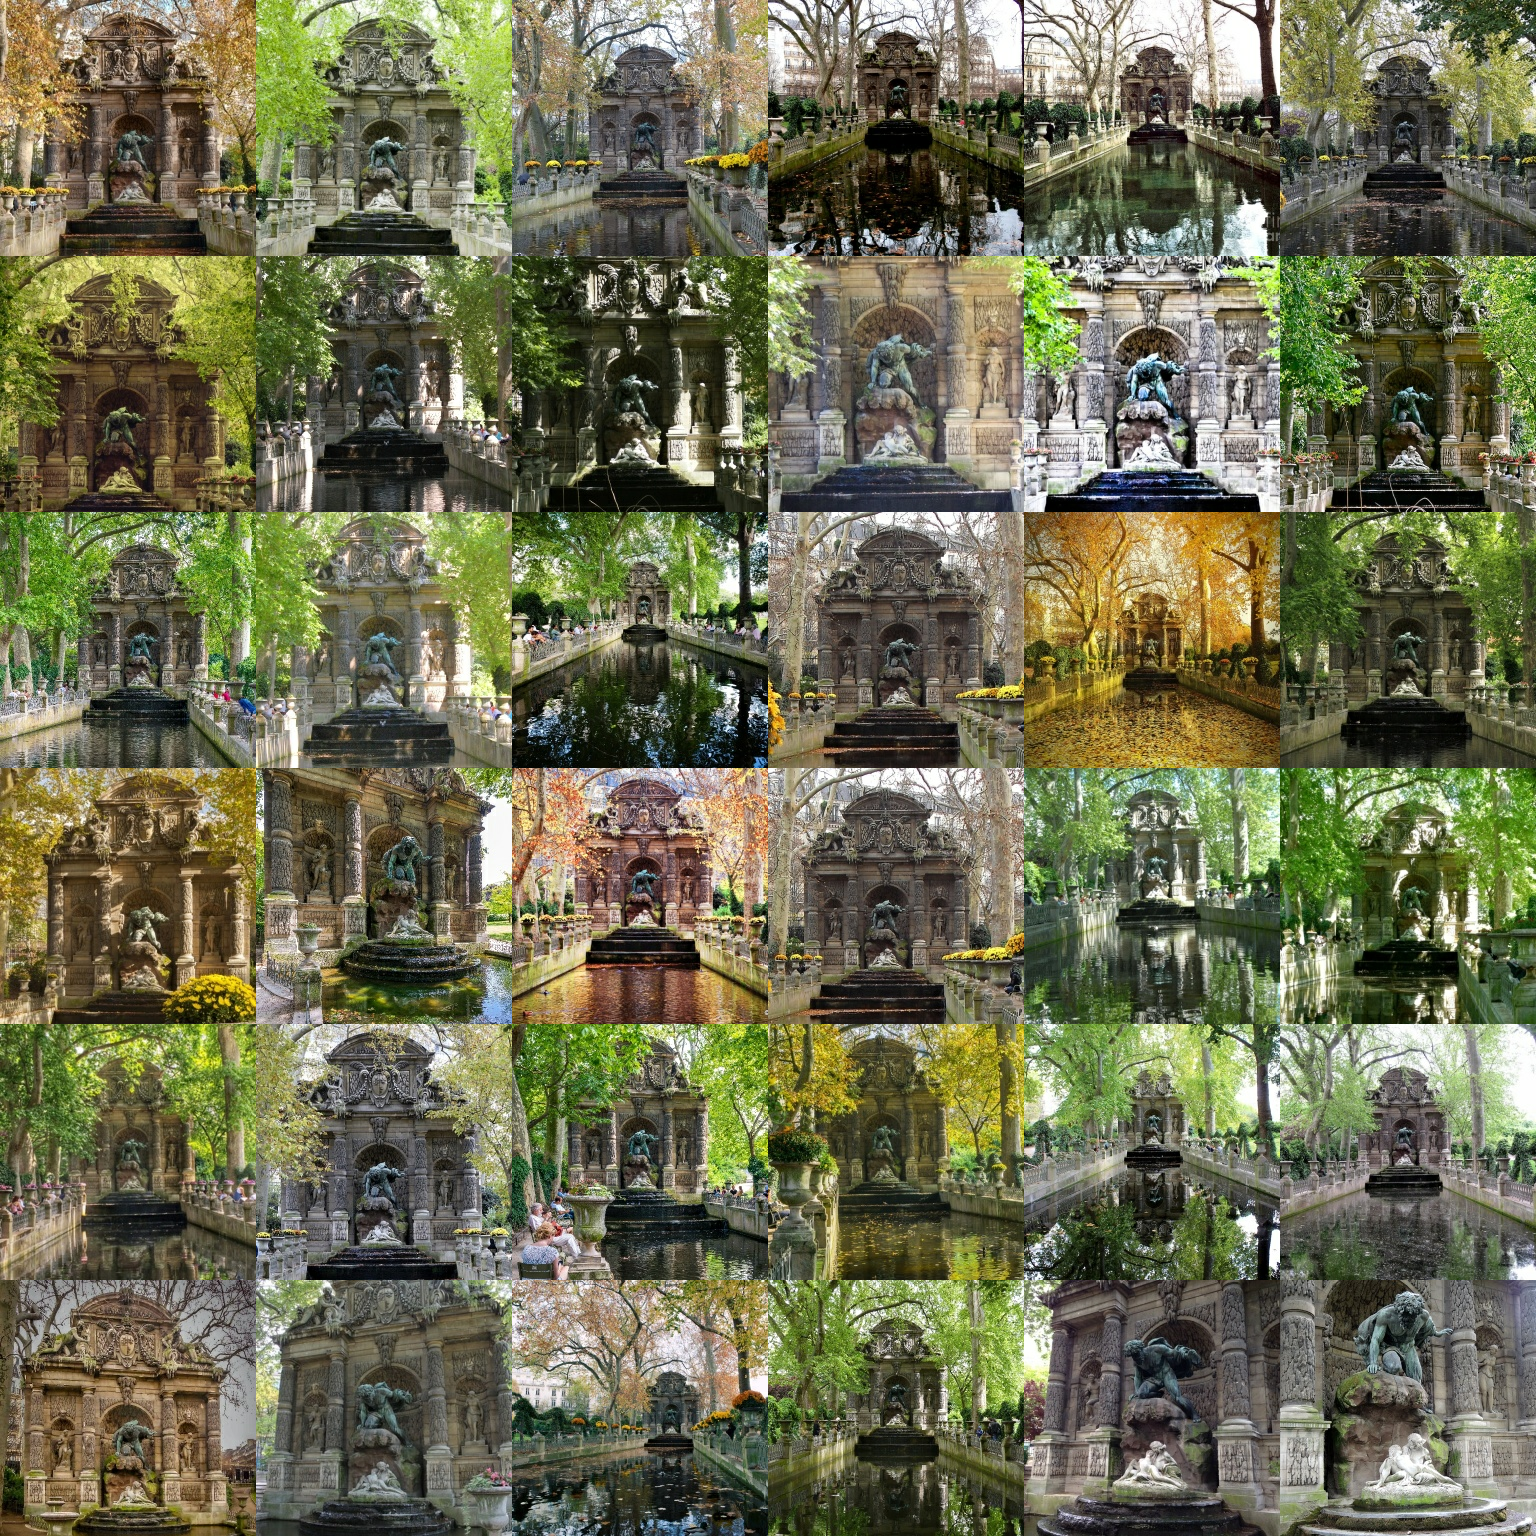

In [26]:
Image.fromarray(image_grid)

In [ ]:
for i in tqdm(range(10000)):

    aug_batch = augmentor.augment(batch, print_fn=True, scale=1.0)
    aug_batch = img_merge(aug_batch.numpy(), n_rows=6).squeeze() 
    aug_batch = Image.fromarray(aug_batch)
    aug_batch.save( f"./notebooks/AugmentationDemo/{dataset_name}/{i}.jpg", "JPEG")

['clone', 'distort_random']
['skew_random1', 'distort_random', 'shear_top_right']
['cutout_random', 'distort_random', 'transform_color_space', 'skew_random4']
['flip_left_right', 'clone', 'cutout_random']
['transform_color_space', 'add_random_contrast']
['transform_color_space', 'clone', 'skew_random4', 'cutout_random', 'shear_down_top_random']
['shift_random']
['flip_left_right', 'shift_random', 'clone']
['clone']
['clone', 'skew_random3']
['distort_random']
['shear_top_down_random', 'transform_color_space', 'skew_random2', 'distort_random']
['shift_random', 'distort_random', 'flip_left_right', 'shear_down_top_random', 'clone']
['shift_random']
['add_random_brightness', 'skew_top_left_random', 'clone', 'cutout_random', 'shear_top_right']
['skew_top_down_random', 'skew_random3', 'flip_left_right', 'distort_random']
['skew_random1']
['skew_random1', 'add_random_contrast', 'cutout_random', 'shift_random', 'transform_color_space']
['distort_random', 'clone']
['distort_random', 'cutout_ran